In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import re
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
import operator
import warnings
warnings.filterwarnings("ignore")

In [3]:
# GET DATA FROM glassdoor.csv AND SELECT ONLY COLUMNS WE ARE INTERESTED IN
jobs = pd.read_csv('dataset/glassdoor.csv', parse_dates=['job.discoverDate'])
best_columns = jobs[['gaTrackerData.jobTitle', 'map.country', 'gaTrackerData.location', 'salary.salaries', 'overview.industry', 'overview.sector']]           
del jobs

# RENAME COLUMNS
rename_columns = {'gaTrackerData.jobTitle': 'jobTitle',
                  'map.country': 'country',
                  'gaTrackerData.location': 'location',
                  'salary.salaries': 'salaries',
                  'overview.industry': 'industry',
                  'overview.sector': 'sector'}
best_columns = best_columns.rename(columns=rename_columns)

# FILL IN NAN AND DROP SALARIES THAT ARE NAN
best_columns['country'].fillna("Unknown", inplace=True)
best_columns['sector'].fillna("Unknown", inplace=True)
best_columns['location'].fillna("Unknown", inplace=True)
best_columns['industry'].fillna("Unknown", inplace=True)
best_columns = best_columns[best_columns['salaries'].notna()]

In [4]:
# FILTER BY ONLY DATA JOBS
def search_job(job_title):
    re_expression = '(?<=data.)'
    job_title = str(job_title)
    job_title = job_title.lower()
    is_the_job = re.search(re_expression, job_title)
    if is_the_job:
        return True
    else:
        return False

best_columns = best_columns[best_columns['jobTitle'].apply(search_job)==True]

In [5]:
counts = best_columns['jobTitle'].value_counts()
best_columns = best_columns.loc[best_columns['jobTitle'].isin(counts.index[counts < 10])]

In [6]:
## N ROWS (CHANGE HERE IF YOU WANNA LOAD IN MORE DATA)
N = 2000
features = best_columns[:N]
features = features.drop(columns=['salaries'])
targets = best_columns['salaries'][:N]

# CREATE GET_DUMMIES AND TRAIN TEST SPLIT ON THEM
algorithms = {}
dummies_train = pd.get_dummies(features)
dummies_test = pd.get_dummies(targets)
X_train, X_valid, y_train, y_valid = train_test_split(dummies_train, dummies_test, test_size = 0.2, random_state = 42)

# n_estimators
n_e1 = 10
n_e2 = 100
n_e3 = 1000

In [7]:
best_columns

,jobTitle,country,location,salaries,industry,sector
16,Data Scientist media,United Kingdom,Charing Cross,2498.0,Staffing & Outsourcing,Business Services
70,Senior Data Analyst (H/F),BE,Brussels,2544.0,Internet,Information Technology
71,GO.Exchange - Data Engineer,TH,Bangkok,2545.0,Financial Transaction Processing,Finance
92,Trainee Service Engineer (Mobile Data),Unknown,Unknown,2562.0,IT Services,Information Technology
116,Tender Engineer - Prefab Data Centers,Unknown,Unknown,2581.0,Energy,"Oil, Gas, Energy & Utilities"
...,...,...,...,...,...,...
165259,Senior Programs Data Analyst - 201680 - Clerk ...,Unknown,Unknown,52053.0,Government Agencies,Government
165262,Data Analyst - Digital Marketing,HK,Unknown,52056.0,Unknown,Unknown
165275,Senior Manager-Data Engineering,Unknown,Unknown,52068.0,Consulting,Business Services
165280,Senior Data Engineer mit Schwerpunkt Distribut...,AT,Graz,52071.0,Unknown,Unknown


# RandomForestRegressor

In [8]:
randomforest_regression_r2 = {}
randomforest_regression_oob = {}
randomforest_regression_validation = {}

In [9]:
rf_basic_regressor_n10 = RandomForestRegressor(n_estimators = n_e1, n_jobs = -1, oob_score = True,
                                           bootstrap = True, random_state = 42)

rf_basic_regressor_n100 = RandomForestRegressor(n_estimators = n_e2, n_jobs = -1, oob_score = True,
                                           bootstrap = True, random_state = 42)

rf_basic_regressor_n1000 = RandomForestRegressor(n_estimators = n_e3, n_jobs = -1, oob_score = True,
                                           bootstrap = True, random_state = 42)


In [10]:
rf_basic_regressor_n10.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [11]:
rf_basic_r2_n10 = rf_basic_regressor_n10.score(X_train, y_train)
rf_basic_oob_n10 = rf_basic_regressor_n10.oob_score_
rf_basic_validation_n10 = rf_basic_regressor_n10.score(X_valid, y_valid)

randomforest_regression_r2['RF_r2_N10'] =  rf_basic_r2_n10
randomforest_regression_oob['RF_oob_N10'] =  rf_basic_oob_n10
randomforest_regression_validation['RF_r2_validation_N10'] =  rf_basic_validation_n10

In [12]:
rf_basic_regressor_n100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [13]:
rf_basic_r2_n100 = rf_basic_regressor_n100.score(X_train, y_train)
rf_basic_oob_n100 = rf_basic_regressor_n100.oob_score_
rf_basic_validation_n100 = rf_basic_regressor_n100.score(X_valid, y_valid)

randomforest_regression_r2['RF_r2_N100'] =  rf_basic_r2_n100
randomforest_regression_oob['RF_oob_N100'] =  rf_basic_oob_n100
randomforest_regression_validation['RF_r2_validation_N100'] =  rf_basic_validation_n100

In [14]:
rf_basic_regressor_n1000.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [15]:
rf_basic_r2_n1000 = rf_basic_regressor_n1000.score(X_train, y_train)
rf_basic_oob_n1000 = rf_basic_regressor_n1000.oob_score_
rf_basic_validation_n1000 = rf_basic_regressor_n1000.score(X_valid, y_valid)

randomforest_regression_r2['RF_r2_N1000'] =  rf_basic_r2_n1000
randomforest_regression_oob['RF_oob_N1000'] =  rf_basic_oob_n1000
randomforest_regression_validation['RF_r2_validation_N1000'] =  rf_basic_validation_n1000

In [16]:
randomforest_regression_r2

{'RF_r2_N10': 0.7742488503302116,
 'RF_r2_N100': 0.8216497679966522,
 'RF_r2_N1000': 0.8271740665429423}

In [17]:
randomforest_regression_oob

{'RF_oob_N10': -0.10888602712295956,
 'RF_oob_N100': 0.11473890628945034,
 'RF_oob_N1000': 0.13258703115777085}

In [18]:
randomforest_regression_validation

{'RF_r2_validation_N10': -0.0025062656641632697,
 'RF_r2_validation_N100': -0.0025062656641632697,
 'RF_r2_validation_N1000': -0.0025062656641632697}

In [19]:
# will be used later when we do one big plot of the best of everything
import operator
rfr2_highest_value = max(randomforest_regression_r2.items(), key=operator.itemgetter(1))[0]
rfr2_selected = randomforest_regression_r2[rfr2_highest_value]
print(rfr2_selected)

0.8271740665429423


(0.7742488503302116, 0.8216497679966522, 0.8271740665429423)


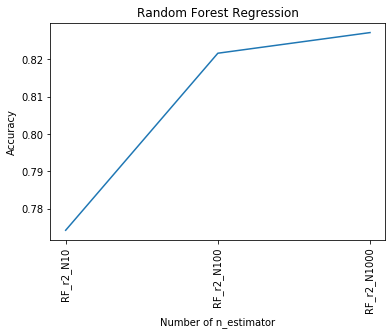

In [20]:
#randomforest_regression_r2  randomforest_regression_oob  randomforest_regression_validation
lists_r2 = sorted(randomforest_regression_r2.items(), key=lambda x: x[1])
lists_oob = sorted(randomforest_regression_oob.items(), key=lambda x: x[1])
lists_r2_validation = sorted(randomforest_regression_validation.items(), key=lambda x: x[1])

plot_r2_x, plot_re_y = zip(*lists_r2)
plot_oob_x, plot_oob_y = zip(*lists_oob)
plot_validation_x, plot_validation_y = zip(*lists_r2_validation)

print(plot_re_y)
plt.plot(plot_r2_x, plot_re_y)
plt.title("Random Forest Regression")
plt.xlabel("Number of n_estimator")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()


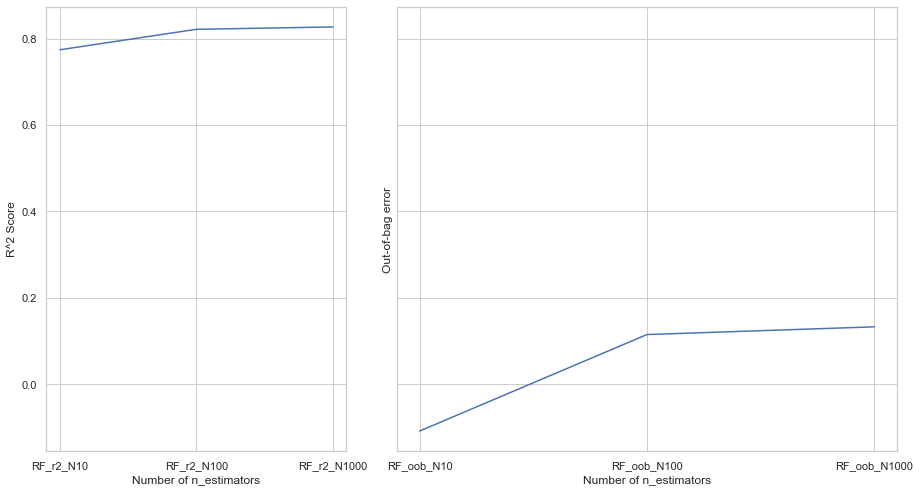

In [21]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)}, figsize=(13,7))

sns.lineplot(x=plot_r2_x, y=plot_re_y,ax=ax_bar).set(ylabel="R^2 Score",xlabel="Number of n_estimators")
sns.lineplot(x=plot_oob_x, y=plot_oob_y, ax=ax_point).set(ylabel="Out-of-bag error",xlabel="Number of n_estimators")

plt.tight_layout()

# RandomForestRegressor BASIC PIPELINE

In [22]:
randomforest_pipeline = {}
pipe_basic = Pipeline([("classifier", RandomForestRegressor())])

search_space_basic = [ {"classifier__n_estimators": [10, 100, 1000]} ]

'''
search_space_basic = [ {"classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5],
                 "classifier__min_samples_leaf":[1],
                 "classifier__max_leaf_nodes": [2]}]
'''
'''
search_space_basic = [
                {"classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5, 8, 15, 25, 30, None],
                 "classifier__min_samples_leaf":[1, 2, 5, 10, 15, 100],
                 "classifier__max_leaf_nodes": [2, 5, 10]}]
                 '''

'\nsearch_space_basic = [\n                {"classifier__n_estimators": [10, 100, 1000],\n                 "classifier__max_depth":[5, 8, 15, 25, 30, None],\n                 "classifier__min_samples_leaf":[1, 2, 5, 10, 15, 100],\n                 "classifier__max_leaf_nodes": [2, 5, 10]}]\n                 '

In [ ]:
# Create grid search
gridsearch_basic = GridSearchCV(pipe_basic, search_space_basic, cv=5, verbose=0, n_jobs=8)
best_model_basic = gridsearch_basic.fit(X_train, y_train)

In [ ]:
print(best_model_basic.best_estimator_)
print("The mean accuracy of the model is:", best_model_basic.score(X_train, y_train))

In [ ]:
print("The mean accuracy of the test model is:", best_model_basic.score(X_valid, y_valid))
#OVERFITTED

#### data outputs from testing
classifier__n_estimators = 0.7834532024505702
classifier__max_depth = 0.02472940443851716
classifier__min_samples_leaf = 0.8357316146346587
classifier__max_leaf_nodes = 0.004950392987272424

+ min_samples_leaf=1
+ max_leaf_nodes=2
+ max_depth=5
+ n_estimator = 10

In [ ]:
rf_pipeline_score = best_model_basic.score(X_train, y_train)
randomforest_pipeline['RF_pipeline'] =  rf_pipeline_score
rf_pipeline_score

# Adaboost Regression

In [ ]:
adaboost_regression = {}

In [ ]:
X_asr, y_asr = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

asr_n10 = AdaBoostRegressor(random_state=0, n_estimators=n_e1)
asr_n100 = AdaBoostRegressor(random_state=0, n_estimators=n_e2)
asr_n1000 = AdaBoostRegressor(random_state=0, n_estimators=n_e3)

asr_n10.fit(X_asr, y_asr)
asr_n100.fit(X_asr, y_asr)
asr_n1000.fit(X_asr, y_asr)

In [ ]:
to_predict = [0,0,0,0]
asr_n10.predict([to_predict])
asr_n100.predict([to_predict])
asr_n1000.predict([to_predict])

In [ ]:
asr_n10_score = asr_n10.score(X_asr, y_asr)
asr_n100_score = asr_n100.score(X_asr, y_asr)
asr_n1000_score = asr_n1000.score(X_asr, y_asr)

adaboost_regression['N_10'] =  asr_n10_score
adaboost_regression['N_100'] =  asr_n100_score
adaboost_regression['N_1000'] =  asr_n1000_score

In [ ]:
# will be used later when we do one big plot of the best of everything
adaboost_highest_value = max(adaboost_regression.items(), key=operator.itemgetter(1))[0]
adaboost_selected = adaboost_regression[adaboost_highest_value]
print(adaboost_selected)

In [ ]:
adaboost_regression

In [ ]:
lists = sorted(adaboost_regression.items(), key=lambda x: x[1])
plot_x, plot_y = zip(*lists)
print(plot_y)
plt.plot(plot_x, plot_y)
plt.title("Adaboost Regression")
plt.xlabel("Number of n_estimator")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

# DecisionTreeRegressor

In [ ]:
descisiontree_regressor = {}
max_depth = 2
min_samples_split = 10

In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth = max_depth)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth = max_depth)
tree_reg3.fit(X_train, y3)

y_pred = sum(tree.predict(X_valid[1:2]) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
descisiontree_cross_val_score = cross_val_score(tree_reg3, X_train, y_train, cv=10)
descisiontree_test_cross_val_score = cross_val_score(tree_reg3, X_valid, y_valid, cv=10)

In [ ]:
descisiontree_cross_val_score

In [ ]:
descisiontree_test_cross_val_score

In [ ]:
# will be used later when we do one big plot of the best of everything
descisiontree_selected = max(descisiontree_cross_val_score)

#### data output from testing
 - max_depth = 2 and min_samples_split = 5  - ->  -0.025641025641026004

 - max_depth = 10 and min_samples_split = 20 -->  -0.025641025641026004


# PLOTS

In [ ]:
algorithms = {}

In [ ]:
#best Random forrest r^2 value
algorithms['Random Forest'] =  rfr2_selected
algorithms['Random Forest Pipeline'] = rf_pipeline_score
algorithms['Adaboost'] = adaboost_selected
algorithms['Descision Tree'] = descisiontree_selected
print(algorithms)

In [ ]:
algorithms_lists = sorted(algorithms.items(), key=lambda x: x[1])
plot_x, plot_y = zip(*algorithms_lists)
print(plot_y)
plt.plot(plot_x, plot_y)
plt.title("All Model Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(algorithms)

### BEST COLUMNS DATA PLOTS

In [ ]:
best_columns.plot(x="jobTitle", y="salaries")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.scatterplot(x='salaries', y='sector', data=best_columns, hue='salaries', s = 30)

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x='salaries',y='sector',data=best_columns)
plt.show()

In [ ]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)}, figsize=(13,7))

sns.barplot(x='salaries', y='country', data=best_columns, ax=ax_bar)
#sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

In [ ]:
best_columns

-------------------------

# ONLY RUN WHEN WORKING ON THE PLOTS

In [ ]:
'''
algorithms = {}
algorithms['RandomForestRegressor_1_train'] =  0.8453734335839596
algorithms['RandomForestRegressor_1_test'] =  -0.0006253908692829105
algorithms['RandomForestRegressor_1_OOB'] =  0.78
algorithms['RandomForestRegressor_pipeline_train'] = 0.7985463659147864
algorithms['AdaboostRegressor_train'] =  0.9771376939813696
algorithms['DecisionTreeRegresspr_train'] = 0.005063162313789384
'''
#Same as above but now each model has its own dict with key and value

randomforest_regression_r2 = {'RF_r2_N10': 0.7763266499582282, 
                              'RF_r2_N100': 0.8347831924255078, 
                              'RF_r2_N1000': 0.8424529497240262}

randomforest_regression_oob = {'RF_oob_N10': -0.1046978664853111,
                               'RF_oob_N100': 0.12129665648748027,
                               'RF_oob_N1000': 0.13688244879543665}

randomforest_regression_validation = {'RF_r2_validation_N10': -0.010101010101010676,
                                      'RF_r2_validation_N100': -0.010101010101010676,
                                      'RF_r2_validation_N1000': -0.010101010101010676}

randomforest_pipeline = {'RF_pipeline': 0.7874852442898624}

adaboost_regression = {'N_10': 0.9498018560826543, 
                       'N_100': 0.9771376939813696, 
                       'N_1000': 0.9791724485436129}

rfr2_selected = 0.8424529497240262
rf_pipeline_score = 0.7893759120022272
adaboost_selected = 0.9791724485436129
descisiontree_selected = -0.025641025641026004

